<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

### Brief

As many people have noticed, the cost of attending college has been steadily rising so rapidly that it outpaces inflation. This leaves many students and their families in difficult situations where they have to decide if attending college is feasible. However, before answering this question, trying to gather accurate data on typical costs is challenging enough.


The Department of Education gathered and published a College Scorecard on its website (https://collegescorecard.ed.gov/data). Even though the DOE dataset has over six thousand colleges and a few thousand columns for the sake of scaling down the data, only colleges with the below criteria are considered:
 * Must be a public institutiont
 * Must be accredited
 * Only the following states are included: Pennsylvania; New York; New Jersey; Virginia; Massachusetts; Rhode Island.

This notebook has two goals:
 * Examining college costs
 * Comparing visualizations using the Matplotlib and Seaborn libraries

With sufficient data cleaned up, wrangling and inspection, college costs can presented with a clearer picture. 



______________
# Data Exploration

We'll import a dataframe that focuses on several characteristics (out of three thousand):

 * UNITID - unique identifier for each school
 * INSTNM - institution name
 * NPT4_PUB - net price of a college
 * STABBR - state abbreviation of college location
 * SCHTYPE - Type of school (public, private)
 * CONTROL - Type of school (public, private)
 * ACCREDAGENCY - The name of the accredittion agency for a college
 * TUITIONFEE_IN - tuition fee for in state attendance
 * BOOKSUPPLY - cost of books and supplies
 * ROOMBOARD_ON - cost of on campus boarding
 * OTHEREXPENSE_ON - other expenses for attendance
 * AVGFACSAL - average teaching salary per month


In [ ]:
import pandas as pd
import sqlalchemy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.ticker as tkr
import matplotlib.patches as mpatches
from matplotlib.axis import Axis


# Define a custom formatter so values in the thousands are converted (e.g. 50k)
def numfmt(x, pos):
    s = '{}k'.format(int(x / 1000))
    return s

xfmt = tkr.FuncFormatter(numfmt)

df = pd.read_csv("https://raw.githubusercontent.com/cliftonleesps/602_adv_prog_tech/main/final_project/df_out.csv")


We can see from the info() function, the inferred data types:


In [ ]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6683 entries, 0 to 6682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UNITID           6683 non-null   int64  
 1   INSTNM           6683 non-null   object 
 2   NOLOAN_YR8_N     6427 non-null   object 
 3   NPT4_PUB         1851 non-null   float64
 4   STABBR           6683 non-null   object 
 5   SCH_DEG          6427 non-null   float64
 6   SCHTYPE          6316 non-null   float64
 7   CONTROL          6683 non-null   int64  
 8   ACCREDAGENCY     6336 non-null   object 
 9   DEP_DEBT_MDN     6549 non-null   object 
 10  CUML_DEBT_N      6229 non-null   object 
 11  TUITIONFEE_IN    3826 non-null   float64
 12  TUITIONFEE_OUT   3564 non-null   float64
 13  BOOKSUPPLY       3432 non-null   float64
 14  ROOMBOARD_ON     2003 non-null   float64
 15  OTHEREXPENSE_ON  2006 non-null   float64
 16  AVGFACSAL        3933 non-null   float64
dtypes: float64(9),

From a visual inspection of the dataset, all of the columns should be numeric except for the institution name. 

We also know not all colleges share statistics and these field values appear in the dataset as "NULL" or "PrivacySuppressed". Fortunately, the Pandas.read_csv() function correctly guessed the column types.

The describe function gives some scale with amounts:


In [ ]:
print(df['NPT4_PUB'].describe())

print("\n\n")

print(df['TUITIONFEE_IN'].describe())


count     1851.000000
mean     10000.180443
std       5347.462402
min       -947.000000
25%       6082.500000
50%       9053.000000
75%      13418.000000
max      48558.000000
Name: NPT4_PUB, dtype: float64



count     3826.000000
mean     15761.711187
std      13765.730102
min        480.000000
25%       5352.750000
50%      11028.500000
75%      21008.000000
max      61788.000000
Name: TUITIONFEE_IN, dtype: float64


We can see by considering the net price and in-state tuition columns, at least half of the rows are eliminated. Also, it's clear the tuition is different from the net price. Tuition costs are only for the institution and doesn't include possible scholarships or discounts given to students.


# Data Wrangling

In order to filter schools that don't meet our above criteria, we'll subset the dataframe by public-control state and accreditation (leaving 369 schools):


In [ ]:
df_states = df
df_states = df_states[df_states['ACCREDAGENCY'].isnull() == False]
df_states = df_states[df_states['CONTROL'] == 1]
df_states = df_states[df_states['STABBR'].isin(['NY', 'PA','DE','VA','NJ','CT','RI','MA'])]
df_states = df_states[['STABBR']]

len(df_states)

369

# Visualizations

### Barchart of the Number of Colleges Per State

To give a broad overview of the number of colleges per state, we'll simply use a bar plot grouped by state. New York and Pennsylvania have the highest number of colleges; perhaps their larger populations can support a larger network than other states (Rhode Island predictably has the lowest number).

Matplotlib features used:
 * Title
 * Axis labels
 * Font formatting
 * axis grid control
 * Custom color palettes

Each bar should have an annotation for its count but the Google Colab version of Matplotlib did not support the bar_label() function.


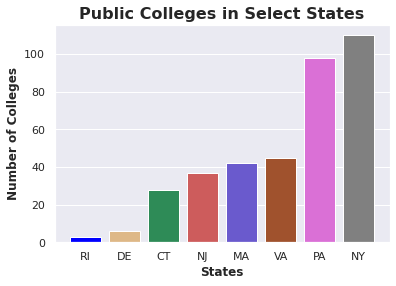

In [ ]:
# Set general theme options
sns.set_theme() #style="whitegrid", palette="pastel")
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Group by states, sort by count
result = df_states.groupby(['STABBR'])['STABBR'].size().sort_values(ascending=True)

# Plot 1 - Barplot by states (Matplotlib)
bars = plt.bar(result.index, result.values, color=['blue','burlywood', 'seagreen', 'indianred', 'slateblue', 'sienna', 'orchid', 'grey'])
#plt.bar_label(bars)
plt.title("Public Colleges in Select States", fontdict= { 'fontsize': 16, 'fontweight':'bold'}, loc='center')
plt.xlabel("States",  fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.ylabel("Number of Colleges", fontdict= { 'fontsize': 12, 'fontweight':'bold'})

# Turn off the x-axis grid
ax = plt.gca()
ax.yaxis.grid(True)
ax.xaxis.grid(False)

plt.show()


### Histogram of Tuition Amounts

Next, a histogram of the net price of colleges is compiled to confirm its distribution. Features used:

 * Background color
 * Font formatting
 * Title, axis setting
 * Custom bar color


First, we'll perform a little more subsetting:


In [ ]:
# clean up the roomboard column
df_histogram = df
df_histogram['ROOMBOARD_ON'] = df_histogram['ROOMBOARD_ON'].fillna(0)

# filter out rows with empty tuition
df_histogram = df_histogram[df_histogram['TUITIONFEE_IN'].isna() == False]


Next the histogram is plotted based on in state tuition prices. From the plot, the prices are not symmetrically distributed but rather right skewed with a peak below \$10k.  We can guess there are some outliers that greatly influence the dataset pushing the mean higher than \$10k.



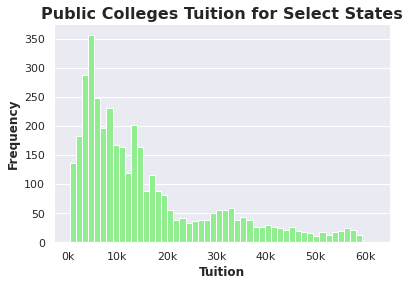

In [ ]:

fig, ax = plt.subplots()
plt.hist(df_histogram['TUITIONFEE_IN'], bins=50, color="lightgreen")
plt.title("Public Colleges Tuition for Select States", fontdict= { 'fontsize': 16, 'fontweight':'bold'}, loc='center')
plt.xlabel("Tuition",  fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.ylabel("Frequency", fontdict= { 'fontsize': 12, 'fontweight':'bold'})
Axis.set_major_formatter(ax.xaxis, xfmt)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax = plt.gca()
ax.yaxis.grid(True)
ax.xaxis.grid(False)

plt.show()


### Scatter Plot of Net College Price Vs. Faculty Salary

Next a quick scatter plot will show the net price as a function of average monthly faculty salary. Although, there is a cluster where salaries between \$6k and \$8k, there doesn't readily appear to be a correlation between the two quantities.

Features:
 * Outside placement of legend
 * Numeric reformatting of axes
 * Color coding per states
 * Grid line control

This legend can be improved by using legend symbols that matched the scatter shapes (filled in circles).



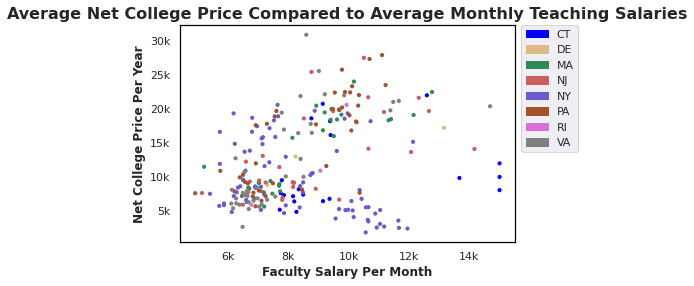

In [ ]:
df_scatter = df
df_scatter = df_scatter[df_scatter['ACCREDAGENCY'].isnull() == False]
df_scatter = df_scatter[df_scatter['CONTROL'] == 1]
df_scatter = df_scatter[df_scatter['STABBR'].isin(['NY', 'PA','DE','VA','NJ','CT','RI','MA'])]

# subset where the two quantities are not null
df_scatter = df_scatter[df_scatter['AVGFACSAL'].isna() == False]
df_scatter = df_scatter[df_scatter['NPT4_PUB'].isna() == False]

# create a map for the scatter dot color scheme
colors = { 'CT' : 'blue',
           'DE' : 'burlywood',
           'MA' : 'seagreen',
           'NJ' : 'indianred',
           'NY' : 'slateblue',
           'PA' : 'sienna',
           'RI' : 'orchid',
           'VA' : 'grey'}
patch_CT = mpatches.Patch(color='blue', label='CT')
patch_DE = mpatches.Patch(color='burlywood', label='DE')
patch_MA = mpatches.Patch(color='seagreen', label='MA')
patch_NJ = mpatches.Patch(color='indianred', label='NJ')
patch_NY = mpatches.Patch(color='slateblue', label='NY')
patch_PA = mpatches.Patch(color='sienna', label='PA')
patch_RI = mpatches.Patch(color='orchid', label='RI')
patch_VA = mpatches.Patch(color='grey', label='VA')

# set the matplotlib configurations
fig, ax = plt.subplots()
scatter = ax.scatter(df_scatter["AVGFACSAL"], df_scatter["NPT4_PUB"], s=10, c=df_scatter['STABBR'].map(colors), cmap=colors, label="dffdf")
plt.title("Average Net College Price Compared to Average Monthly Teaching Salaries", fontdict= { 'fontsize': 16, 'fontweight':'bold'}, loc='center')
plt.xlabel("Faculty Salary Per Month",  fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.ylabel("Net College Price Per Year", fontdict= { 'fontsize': 12, 'fontweight':'bold'})
Axis.set_major_formatter(ax.xaxis, xfmt)
Axis.set_major_formatter(ax.yaxis, xfmt)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.set_facecolor('white')
u, d = np.unique(df_scatter["STABBR"], return_inverse=True)

# Use the patches in the legend
ax.legend(handles=[patch_CT,patch_DE,patch_MA,patch_NJ,patch_NY,patch_PA,patch_RI,patch_VA], 
          bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### Stacked Barchart of College Cost Types

For the selected states, comparing the four basic median costs across school types can also be helpful. The four costs are: tuition (in state); books; housing; other.


Features:
  * Stacked bars
  * Font setting
  * Custom bar colors

The median costs for the private colleges are in the high 40's or 30's while public colleges are more than 20k. Furthermore, supply, housing and miscellaneous expenses are consistent across all three types as well. This leaves the tuition as the biggest differentiator among schools.


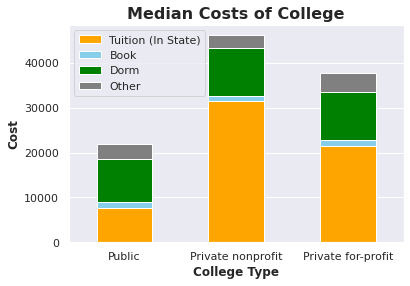

In [ ]:
df_control1 = df[(df['ROOMBOARD_ON'] > 0.0) & (df['TUITIONFEE_IN'] > 0.0) & (df['BOOKSUPPLY'] > 0.0) & (df['OTHEREXPENSE_ON'] > 0.0) & (df['CONTROL'] == 1)]
df_control2 = df[(df['ROOMBOARD_ON'] > 0.0) & (df['TUITIONFEE_IN'] > 0.0) & (df['BOOKSUPPLY'] > 0.0) & (df['OTHEREXPENSE_ON'] > 0.0) & (df['CONTROL'] == 2)]
df_control3 = df[(df['ROOMBOARD_ON'] > 0.0) & (df['TUITIONFEE_IN'] > 0.0) & (df['BOOKSUPPLY'] > 0.0) & (df['OTHEREXPENSE_ON'] > 0.0) & (df['CONTROL'] == 3)]

df_cost_chart = pd.DataFrame( { 'Tuition (In State)' : [df_control1['TUITIONFEE_IN'].median(), df_control2['TUITIONFEE_IN'].median(), df_control3['TUITIONFEE_IN'].median()],
                                'Book' : [df_control1['BOOKSUPPLY'].median(), df_control2['BOOKSUPPLY'].median(), df_control3['BOOKSUPPLY'].median()],
                                'Dorm' : [df_control1['ROOMBOARD_ON'].median(), df_control2['ROOMBOARD_ON'].median(), df_control3['ROOMBOARD_ON'].median()],
                                'Other' : [df_control1['OTHEREXPENSE_ON'].median(), df_control2['OTHEREXPENSE_ON'].median(), df_control3['OTHEREXPENSE_ON'].median()]},
                              index = ['Public','Private nonprofit','Private for-profit'])

# Matplot lib bar chart
df_cost_chart.plot(kind='bar', stacked=True, color=['orange', 'skyblue', 'green', 'gray'])
plt.xticks(rotation=0)
plt.title('Median Costs of College',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, loc='center')
plt.xlabel('College Type', fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.ylabel("Cost", fontdict= { 'fontsize': 12, 'fontweight':'bold'})
Axis.set_major_formatter(ax.yaxis, xfmt)

ax = plt.gca()
ax.yaxis.grid(True)
ax.xaxis.grid(False)
plt.show()


# Visualizations in Seaborn

As a comparison, Seaborn plotting functions are used below. For plot comments and explanation, please see the previous section.



### Barchart of the Number of Colleges Per State


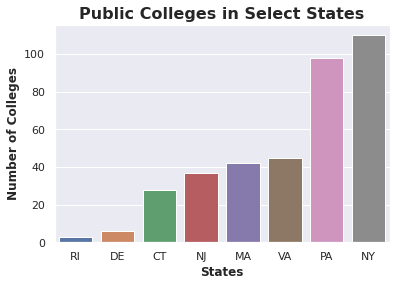

In [ ]:
barplot = sns.barplot(x = result.index, y = result.values)
barplot.set_xlabel("States",  fontdict= { 'fontsize': 12, 'fontweight':'bold'})
barplot.set_ylabel("Number of Colleges", fontdict= { 'fontsize': 12, 'fontweight':'bold'})
barplot.set_title('Public Colleges in Select States', fontdict= { 'fontsize': 16, 'fontweight':'bold'})
#barplot.bar_label(barplot.containers[0])

plt.show()


### Histogram of Tuition Amounts


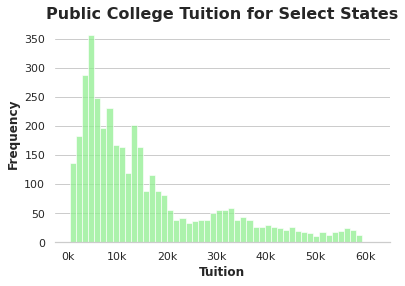

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel",rc={"axes.spines.left": False, "axes.spines.right": False, "axes.spines.top": False})
histogram = sns.histplot(data=df_histogram,bins=50, x="TUITIONFEE_IN", color="lightgreen")
histogram.set_xlabel("Tuition",  fontdict= { 'fontsize': 12, 'fontweight':'bold'})
histogram.set_ylabel("Frequency", fontdict= { 'fontsize': 12, 'fontweight':'bold'})
histogram.set_title('Public College Tuition for Select States', fontdict= { 'fontsize': 16, 'fontweight':'bold'})
histogram.xaxis.grid(False) 
histogram.xaxis.set_major_formatter(xfmt)
plt.show()


### Scatter Plot of Net College Price Vs. Faculty Salary


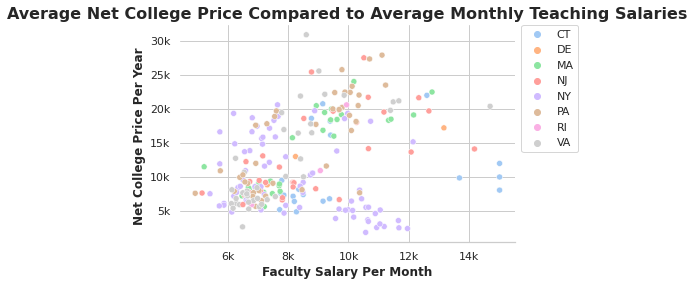

In [ ]:
df_scatter = df
df_scatter = df_scatter[df_scatter['ACCREDAGENCY'].isnull() == False]
df_scatter = df_scatter[df_scatter['CONTROL'] == 1]
df_scatter = df_scatter[df_scatter['STABBR'].isin(['NY', 'PA','DE','VA','NJ','CT','RI','MA'])]
df_scatter = df_scatter[df_scatter['AVGFACSAL'].isna() == False]
df_scatter = df_scatter[df_scatter['NPT4_PUB'].isna() == False]

scatterplot = sns.scatterplot(data=df_scatter, x="AVGFACSAL", y="NPT4_PUB", hue="STABBR")
scatterplot.set_xlabel("Faculty Salary Per Month",  fontdict= { 'fontsize': 12, 'fontweight':'bold'})
scatterplot.set_ylabel("Net College Price Per Year ", fontdict= { 'fontsize': 12, 'fontweight':'bold'})
scatterplot.set_title('Average Net College Price Compared to Average Monthly Teaching Salaries', fontdict= { 'fontsize': 16, 'fontweight':'bold'})
scatterplot.xaxis.set_major_formatter(xfmt)
scatterplot.yaxis.set_major_formatter(xfmt)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


### Stacked Barchart of College Cost Types


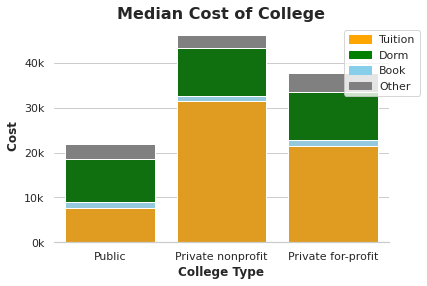

In [ ]:
df_cost_sea = df_cost_chart.copy()
df_cost_sea['Book'] = df_cost_sea['Book'] + df_cost_sea['Tuition (In State)']
df_cost_sea['Dorm'] = df_cost_sea['Dorm'] + df_cost_sea['Book']
df_cost_sea['Other'] = df_cost_sea['Other'] + df_cost_sea['Dorm']



# Seaborn bar chart

sns.barplot(data=df_cost_sea, x=['Public','Private nonprofit','Private for-profit'], y="Other", color='gray')
sns.barplot(data=df_cost_sea, x=['Public','Private nonprofit','Private for-profit'], y="Dorm", color='green')
sns.barplot(data=df_cost_sea, x=['Public','Private nonprofit','Private for-profit'], y="Book", color='skyblue')
b = sns.barplot(data=df_cost_sea, x=['Public','Private nonprofit','Private for-profit'], y="Tuition (In State)", color='orange')

b.set_xlabel("College Type",  fontdict= { 'fontsize': 12, 'fontweight':'bold'})
b.set_ylabel("Cost ", fontdict= { 'fontsize': 12, 'fontweight':'bold'})
b.set_title('Median Cost of College', fontdict= { 'fontsize': 16, 'fontweight':'bold'})
b.yaxis.set_major_formatter(xfmt)
b.xaxis.grid(False)
b.yaxis.grid(True)
patch_other = mpatches.Patch(color='gray', label='Other')
patch_dorm = mpatches.Patch(color='green', label='Dorm')
patch_book = mpatches.Patch(color='skyblue', label='Book')
patch_tuition = mpatches.Patch(color='orange', label='Tuition')
plt.legend(handles=[patch_tuition, patch_dorm, patch_book, patch_other], loc = 2, bbox_to_anchor = (0.85,1))

plt.show()


# Differences Between Matplotlib and Seaborn

What immediately jumps out is the number of granular controls Matplotlib supports. As long as the graph object is obtained, the list of configurable settings gets to be a bit overwhelming. One of the biggest hurdles in constructing a Matplotlib legend was including all of the necessary libraries and different classes and data structure representing the legend symbols, colors and labels. A lof a flexibility is possibile but many decisions have to be made when using Matplotlib plots.

On the other hand, Seaborn takes a quick and basic approach by providing plot functions with some configuration settings. The idea that Seaborn tries to balance flexibility with usability and ease of use; the Seaborn scatter plot required eight lines of code versus twenty seven for Matplotlib.

Matplotlib is somewhat akin to programming in Java where the programmer has to write a significant amount of 'ceremonial code' before getting to the actual task at hand; brevity is not the point. Using Seaborn is closer to spirit of many scripting languages where speed is valued most.  As long as the required dataframe is supplied to a plot, Seaborn makes it simple to create quick plots.

The one exception to this rule was the stacked bar plots. Submitting a dataframe that separate costs by type and school-type is acceptable to Matplotlib but Seaborn required extra dataframe transformations (each cost amount was relative) otherwise, the plots would be 'hidden' behind each other.

After this exercise and considering my own work experience, I would advise using Seaborn libraries to quickly prototype plots in early drafts with a client. After receiving client feedback or receiving new requirements, deciding on whether to stay with Seaborn or reimplementing with Matplotlib can done later.


# Conclusions

From the few plots, it becomes apparent going to a public college will cut the out of pocket expense for most students by at least half compared to private schools with tuition being the largest differentiator (most other expenses were similar). What is not considered here, however are other important data such as tuition discounts, future earnings from various programs and the amount of typical outstanding loans.  Also, the tuition rates do not readily appear to be related to the average faculty salary. 

Additionally, obtaining similar plots in Matplotlib typically took twice as many lines of code as it would using Seaborn plots. If the requirement for plotting data is a quick presentation, Seaborn is the optimal library. However, if custom design and uniqueness is important, Matplotlib is the better choice for configurable plots.
